In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set
%precision 3
%matplotlib inline

In [11]:
print('円周率：{:.3f}'.format(sp.pi))
print('自然数底：{:.3f}'.format(sp.exp(1))) # exp(1) eの1乗

円周率：3.142
自然数底：2.718


# 確率密度
```
離散型の変数であれば、確率を直接計算することができる。
ex サイコロで1の目が出る確率は1/6
しかし、連続型の変数は確率を計算できない。
このとき確率の代わりに確率密度を利用する。
確率密度　= 連続型の変数に対応した確率
例えば『体調4cm以上、5センチ以下』になる確率を求めたいときは、確率密度を4以上5以下の間で足し合わせればいい。
ここで積分を使う、
無限にある4以上、5以下のすべての変数における確率密度を足し合わせる
```

In [17]:
#　確率変数
x = 3 
# 平均
mu = 4
#標準偏差
sigma = 0.8 
1 / (sp.sqrt(2*sp.pi * sigma** 2)) *sp.exp(-((x - mu)**2) / (2 * sigma**2))

0.228

In [18]:
sp.stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.228

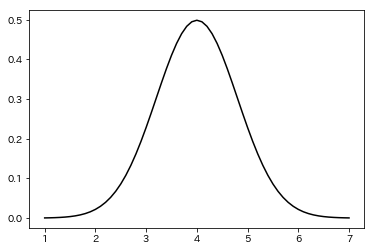

In [23]:
#確率密度を図示する
# 1-7の0.1区切りのサイズ
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(x_plot , sp.stats.norm.pdf( x = x_plot, loc = 4, scale = 0.8), color = 'black')

# 標本がある値以下となる割合
```
標本がある値以下となる割合 = ある値以下となったデータの個数 / サンプルサイズ
```

In [25]:
np.random.seed(1)
#平均4、分散0.64　の正規分布から 100000抽出する
simulated_sample = stats.norm.rvs(loc = 4, scale = 0.8, size = 100000)
simulated_sample

array([ 5.299,  3.511,  3.577, ...,  4.065,  4.275,  3.402])

In [27]:
sp.sum(simulated_sample <= 3) / len(simulated_sample)

0.104

# 累積分布関数
```
ある値以下となる確率を計算する
```

In [28]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.106

In [29]:
# データが平均以下となる確率は　50%　以下
stats.norm.cdf(loc = 4, scale =0.8, x =4)

0.500

In [32]:
#下側確率が2.5%となるパーセント点を求める
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.432

In [34]:
#下側確率とパーセント点の関係から以下の関係が成り立つ
#下側確率：3以下となる確率
sitagawa = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
stats.norm.ppf(loc = 4, scale = 0.8, q = sitagawa)

3.000

```
1行目；確率変数の値から確率に変換
2行目：確率から確率変数に変換
```

In [35]:
#下側確率が50%となるパーセント点は平均に一致する
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.000

# t値
```
t = (標本平均 - 母平均)/標準誤差
```

In [61]:
# 乱数の生成
np.random.seed(1)
# t値を格納する入れ物
t_value_array = np.zeros(10000)
#正規分布クラスのインスタンス
norm_dist = stats.norm(loc = 4, scale = 0.8)
# シュミレーションの実行
for i in range(0,10000):
    #期待値loc，標準偏差scaleの正規分布に従う確率変数をsize個ランダムに取得します．
    sample = norm_dist.rvs(size = 10)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)
    #標準誤差
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

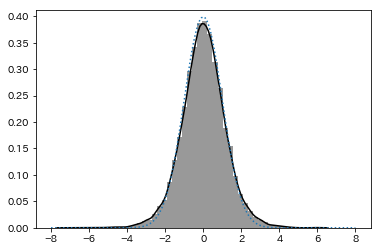

In [53]:
#　t値のヒストグラム
sns.distplot(t_value_array, color = 'black')
# 標準正規分布の確率密度
#連続型変数
x = np.arange(start = -8, stop = 8.1, step = 0.1)
# stats.norm.pdf：stats.norm.pdf
plt.plot(x, stats.norm.pdf(x = x),linestyle = 'dotted')

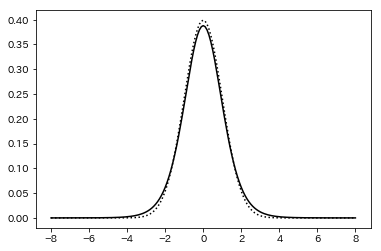

In [56]:
# 標準正規分布の確率密度
plt.plot(x, stats.norm.pdf(x = x), color = 'black', linestyle = 'dotted')
# t分布の確率密度
plt.plot(x, stats.t.pdf(x = x, df = 9),color = 'black')

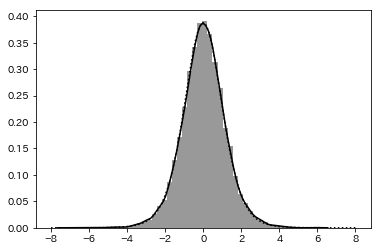

In [59]:
sns.distplot(t_value_array, color = 'black', norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df = 9),color = 'black',linestyle = 'dotted')

```
t分布の意義
母分散がわかっていなくても、標本平均の分布について言及することができる。
```